# Features Notebook

This notebook seems to extract, visualize and help understand the different features that can describe sound bites

In [2]:
# Import the required libraries
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import scipy.fftpack
import math
import soundfile as sf
import sklearn.preprocessing
import pandas as pd

from scipy.io import wavfile
from scipy.signal import find_peaks

from sklearn.neural_network import MLPClassifier

import IPython.display as ipd

## Importing and visualising sounds

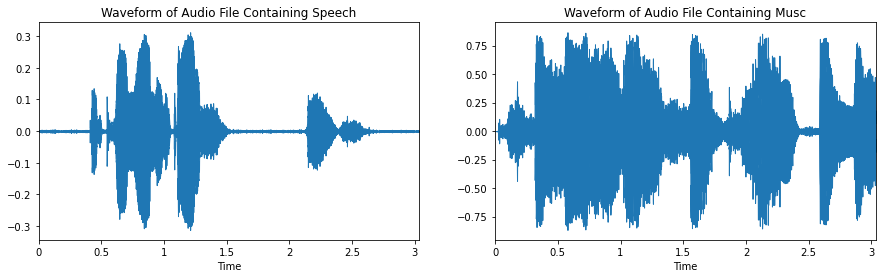

In [3]:
speech_file = "../dataset/Speech_1/84-121123-0015.flac"
music_file = "../dataset/Music/043761.wav"

# read WAV file
# sampling_rate_music, data= wavfile.read(music_file) # enter your filename
sampling_rate_music = librosa.get_samplerate(music_file)
sampling_rate_speech = librosa.get_samplerate(speech_file)

# Load the audio as a waveform `y` and store the sampling rate as `sr`
y_speech, sr_speech = librosa.load(speech_file)
y_music, sr_music = librosa.load(music_file)


# Shape music to be the same length as speech
y_music = y_music[0:y_speech.shape[0]]

# Plot the sound clips
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
arr = librosa.display.waveplot(y_speech, sr=sr_speech)
plt.title("Waveform of Audio File Containing Speech");

plt.subplot(1,2,2)
librosa.display.waveplot(y_music, sr=sr_music)
plt.title("Waveform of Audio File Containing Musc");



## Creating Overlapping Slices

In [103]:
# Set paramaters
frequency_of_frames = 50
frame_time_seconds = 1/50 
overlap_time_seconds = 0.000001
interval = int(frame_time_seconds * 1000)
overlap = int(overlap_time_seconds * 1000)

# Initialize start and end seconds to 0 
start = 0
end = 0

# Length of audiofile in milliseconds
n = int(len(y_speech)/sr_speech*1000)

# counters and flags
counter = 1
flag = 0

# Logic for slicing
for i in range(0, 2 * n, interval): 
    if i == 0: 
        start = 0
        end = interval 
    else: 
        start = end - overlap 
        end = start + interval  
    if end >= n: 
        end = n 
        flag = 1
    counter = counter + 1
    print("{} sample \t{} sample".format(int(start/1000*sr_speech),int(end/1000*sr_speech)-1))
    if flag == 1: 
        break

print(counter)
    


0 sample 	440 sample
441 sample 	881 sample
882 sample 	1322 sample
1323 sample 	1763 sample
1764 sample 	2204 sample
2205 sample 	2645 sample
2646 sample 	3086 sample
3087 sample 	3527 sample
3528 sample 	3968 sample
3969 sample 	4409 sample
4410 sample 	4850 sample
4851 sample 	5291 sample
5292 sample 	5732 sample
5733 sample 	6173 sample
6174 sample 	6614 sample
6615 sample 	7055 sample
7056 sample 	7496 sample
7497 sample 	7937 sample
7938 sample 	8378 sample
8379 sample 	8819 sample
8820 sample 	9260 sample
9261 sample 	9701 sample
9702 sample 	10142 sample
10143 sample 	10583 sample
10584 sample 	11024 sample
11025 sample 	11465 sample
11466 sample 	11906 sample
11907 sample 	12347 sample
12348 sample 	12788 sample
12789 sample 	13229 sample
13230 sample 	13670 sample
13671 sample 	14111 sample
14112 sample 	14552 sample
14553 sample 	14993 sample
14994 sample 	15433 sample
15434 sample 	15875 sample
15876 sample 	16316 sample
16317 sample 	16757 sample
16758 sample 	17198 sample

## Spectogram 

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.

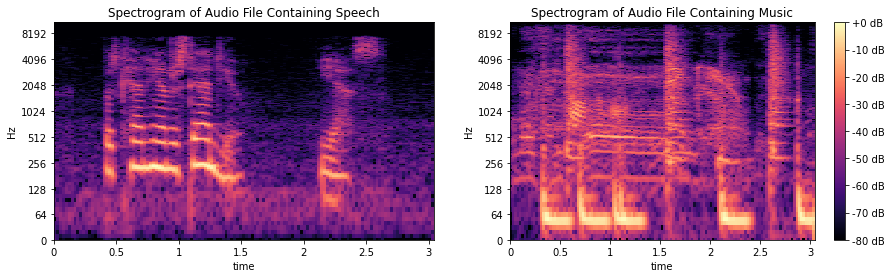

In [4]:
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
Spec_speech = librosa.amplitude_to_db(np.abs(librosa.stft(y_speech)), ref=np.max)
librosa.display.specshow(Spec_speech, y_axis='log',x_axis='time',sr=sr_speech)
plt.title('Spectrogram of Audio File Containing Speech');
plt.xlabel('time');

plt.subplot(1,2,2)
Spec_music = librosa.amplitude_to_db(np.abs(librosa.stft(y_music)), ref=np.max)
librosa.display.specshow(Spec_music, y_axis='log',x_axis='time',sr=sr_music)
plt.title('Spectrogram of Audio File Containing Music');
plt.xlabel('time');

plt.colorbar(format='%+2.0f dB');

## Power Spectrogram

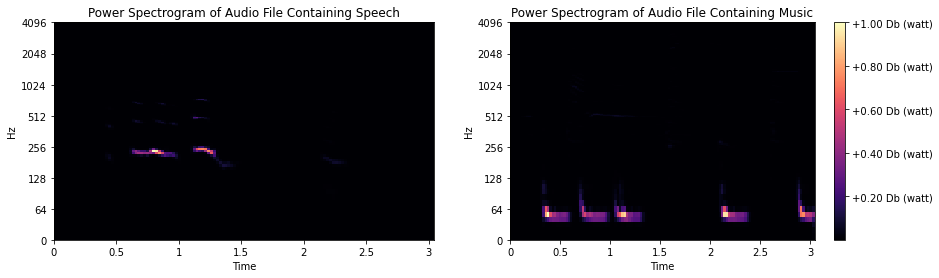

In [5]:
# Calculate Power Spectrogram
power_psec_speech = librosa.db_to_power(Spec_speech)
power_psec_music = librosa.db_to_power(Spec_music)

# Display results
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
librosa.display.specshow(power_psec_speech, y_axis='log',x_axis='time',sr=sr_speech)
plt.title('Power Spectrogram of Audio File Containing Speech');
# plt.xlabel('time');
plt.ylim(0,4096)

plt.subplot(1,2,2)
librosa.display.specshow(power_psec_music, y_axis='log',x_axis='time',sr=sr_music)
plt.title('Power Spectrogram of Audio File Containing Music');
# plt.xlabel('time');
plt.ylim(0,4096)

plt.colorbar(format='%+2.2f Db (watt)');

## Mel Spectogram

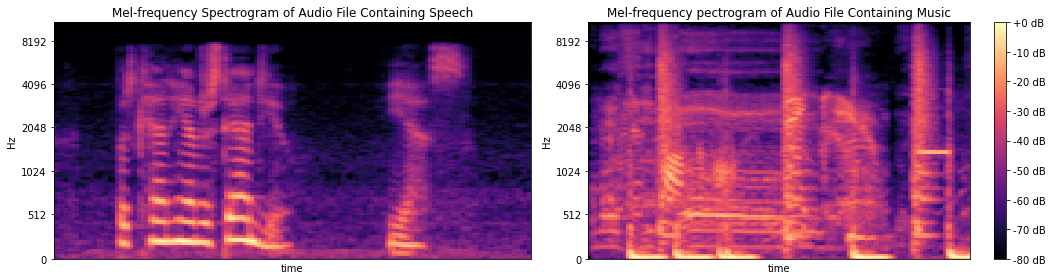

In [6]:
mel_spec_speech=librosa.feature.melspectrogram(y_speech)
mel_spec_music=librosa.feature.melspectrogram(y_music)

S_db_mel_spec_speech = librosa.power_to_db(mel_spec_speech, ref=np.max)
S_db_mel_spec_music = librosa.power_to_db(mel_spec_music, ref=np.max)

plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
librosa.display.specshow(S_db_mel_spec_speech, y_axis='mel')
plt.title('Mel-frequency Spectrogram of Audio File Containing Speech');
plt.xlabel('time');

plt.subplot(1,2,2)
librosa.display.specshow(S_db_mel_spec_music, y_axis='mel')
plt.title('Mel-frequency pectrogram of Audio File Containing Music');
plt.xlabel('time');

plt.tight_layout()
plt.colorbar(format='%+2.0f dB');

## Zero-Crossing Rate

The zero-crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to zero to negative or from negative to zero to positive, and can be used as a key feature to classify percussive sounds

Number of frames : 152
441


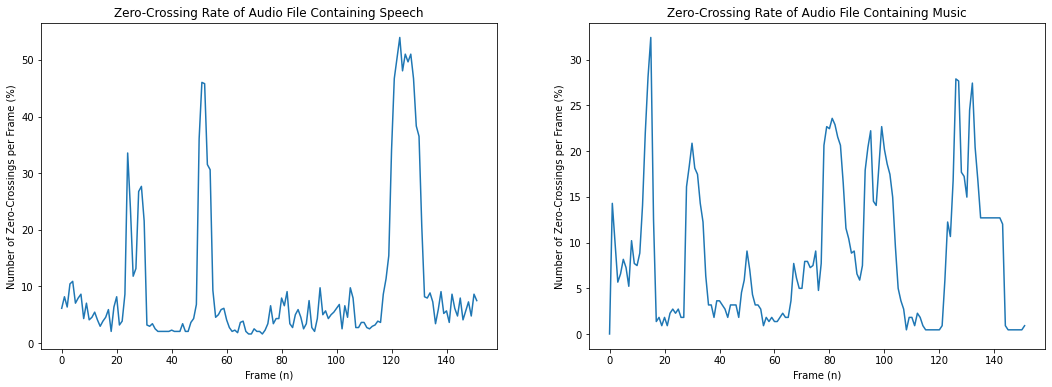

In [47]:
plt.figure(figsize=(18, 6))

# Determine frame length
frame_freq = 50
frame_length = int (sr_speech / frame_freq)          # number of samples a frame is composed of
hop_length = int(frame_length*4/4)                   # delay from start of one frame to start of next frame                    

# Get zero crossing rate
speech_crossrate = librosa.feature.zero_crossing_rate(y_speech,frame_length=frame_length,hop_length=hop_length)*100
music_crossrate  = librosa.feature.zero_crossing_rate(y_music[0:y_speech.shape[0]],frame_length=frame_length,hop_length=hop_length)*100

# Display results
plt.subplot(1,2,1)
plt.plot(speech_crossrate[0]);
plt.title('Zero-Crossing Rate of Audio File Containing Speech');
plt.xlabel('Frame (n)');
plt.ylabel('Number of Zero-Crossings per Frame (%)');

plt.subplot(1,2,2)
plt.plot(music_crossrate[0]);
plt.title('Zero-Crossing Rate of Audio File Containing Music');
plt.xlabel('Frame (n)');
plt.ylabel('Number of Zero-Crossings per Frame (%)');

print("Number of frames : {}".format(speech_crossrate.size))

Number of frames : 152


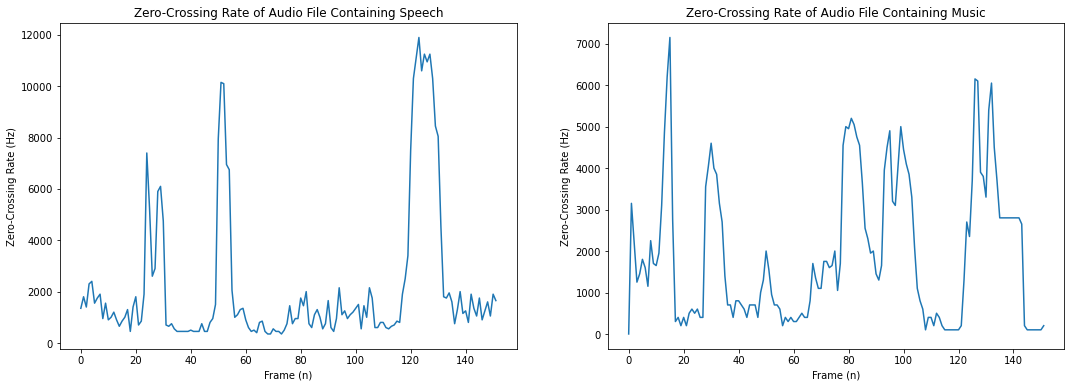

In [4]:
plt.figure(figsize=(18, 6))

# Determine frame length
frame_freq = 50
frame_length = int (sr_speech / frame_freq)          # number of samples a frame is composed of
frame_length_time = 1/50
hop_length = int(frame_length*4/4)                   # delay from start of one frame to start of next frame                    

# Get zero crossing rate
speech_crossrate = librosa.feature.zero_crossing_rate(y_speech,frame_length=frame_length,hop_length=hop_length)*frame_length/frame_length_time
music_crossrate  = librosa.feature.zero_crossing_rate(y_music[0:y_speech.shape[0]],frame_length=frame_length,hop_length=hop_length)*frame_length/frame_length_time

# Display results
plt.subplot(1,2,1)
plt.plot(speech_crossrate[0]);
plt.title('Zero-Crossing Rate of Audio File Containing Speech');
plt.xlabel('Frame (n)');
plt.ylabel('Zero-Crossing Rate (Hz)');

plt.subplot(1,2,2)
plt.plot(music_crossrate[0]);
plt.title('Zero-Crossing Rate of Audio File Containing Music');
plt.xlabel('Frame (n)');
plt.ylabel('Zero-Crossing Rate (Hz)');

print("Number of frames : {}".format(speech_crossrate.size))

### Variance of Zero-Crossing Rate

Allows us to measure distribution of zero-crossing rate. This is done by
- Measuring the local variance of zero-crossing rate  over each second of data (50 frames)
- Measure mean of local variances

In [41]:
# Calculate Local Variance of Zero-Crossing Rate
local_var_zero_crossing_speech = []
local_var_zero_crossing_music = []

end=0
for i in range ( 0 , int( speech_crossrate.size/50) ):
    local_var_zero_crossing_speech.append( np.var(speech_crossrate[0][( 50*i ):( (50)*(i+1) -1)]) )
    local_var_zero_crossing_music.append ( np.var(music_crossrate[0][( 50*i ):( (50)*(i+1) -1)]) )
    # print(np.var(speech_crossrate[( 50*i ):( (50-1)*(i+1) )]))
    # print("{} {} {}".format(i,50*i, (50)*(i+1) -1 ))
    end = i+1
# print("{} {}".format(50*end, speech_crossrate.size-1))
local_var_zero_crossing_speech.append( np.var(speech_crossrate[0][( 50*end ): speech_crossrate.size ]) )
local_var_zero_crossing_music.append( np.var(speech_crossrate[0][( 50*end ): music_crossrate.size ]) )

# Calculate Average Variance of Zero-Crossing Rate
avg_var_zero_crossing_speech = np.average(local_var_zero_crossing_speech)
avg_var_zero_crossing_music = np.average(local_var_zero_crossing_music)


# print(speech_crossrate.T.size)
# for i,x in enumerate(local_var_zero_crossing_speech):
#     print("{} {}".format(i,x))

print()

# Print Results
print("Local Variances of Speech Zero-Crossing rate is {} with an average of {} ".format(local_var_zero_crossing_speech, avg_var_zero_crossing_speech ))
print("Local Variances of Music Zero-Crossing rate is {} with an average of {} ".format(local_var_zero_crossing_music, avg_var_zero_crossing_music ))

print()

print('Total variance of Speech Zero-Crossing rate : ', np.var(speech_crossrate))
print('Total variance of Music Zero-Crossing rate : ',np.var(music_crossrate))


Local Variances of Speech Zero-Crossing rate is [0.005293800029472605, 0.011327060017089968, 0.029358515584492855, 3.213681542155791e-05] with an average of 0.011502878111619248 
Local Variances of Music Zero-Crossing rate is [0.0055603988051959805, 0.005262310501178822, 0.007187925994837109, 3.213681542155791e-05] with an average of 0.004510693029158367 

Total variance of Speech Zero-Crossing rate :  0.0161981336191028
Total variance of Music Zero-Crossing rate :  0.006128275045945497


## Fast Faourier Transform (FFT)

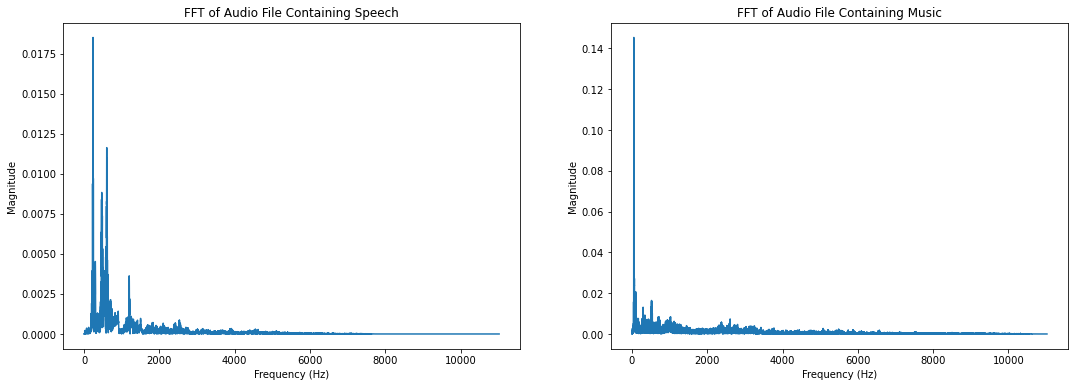

In [83]:
# Number of samplepoints
N_music = int(y_music.shape[0])
N_speech = int(y_speech.shape[0])

# sample spacing
T_music = 1.0 / sr_music
T_speech = 1.0 / sr_speech

## FFT
speech_fft = scipy.fftpack.fft(y_speech)
music_fft = scipy.fftpack.fft(y_music)

## Frequencies
speech_freqs = np.linspace(0.0, 1.0/(2.0*T_speech), int(N_speech/2))
music_freqs = np.linspace(0.0, 1.0/(2.0*T_music), int(N_music/2))

# Plot Results
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.plot(speech_freqs, 2.0/N_speech * np.abs(speech_fft[:N_speech//2]));
plt.title('FFT of Audio File Containing Speech')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(1,2,2)
plt.plot(music_freqs, 2.0/N_music * np.abs(music_fft[:N_music//2]));
plt.title('FFT of Audio File Containing Music')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude');


## Mel Frequency Cepstral Coefficients (MFCCs)

In [84]:
# Extract MFCCs
mfccs_speech = librosa.feature.mfcc(y_speech)
mfccs_music = librosa.feature.mfcc(y_music)

# Scale MFCCs
mfccs_speech = sklearn.preprocessing.scale(mfccs_speech, axis=1)
mfccs_music = sklearn.preprocessing.scale(mfccs_music, axis=1)

C:\Users\user-pc\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\user-pc\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\user-pc\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\U

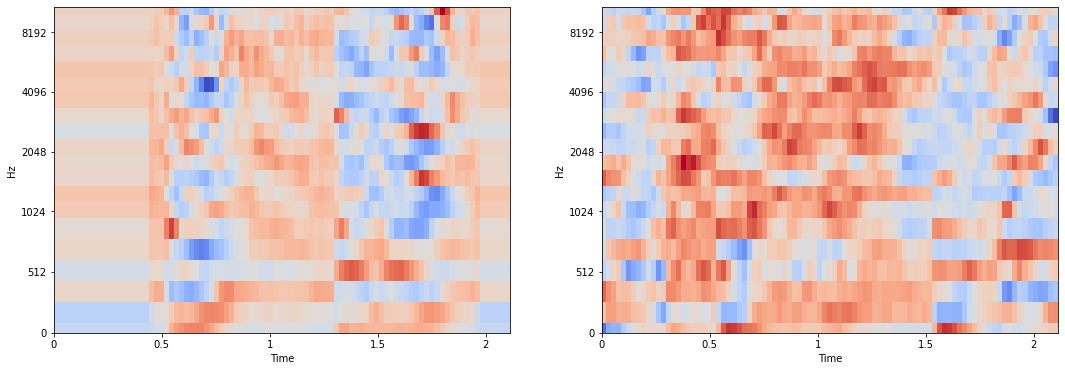

In [85]:
# Plot Results
plt.figure(figsize=(18, 6));

plt.subplot(1,2,1)
librosa.display.specshow(mfccs_speech, x_axis='time',y_axis='mel')

plt.subplot(1,2,2)
librosa.display.specshow(mfccs_music, x_axis='time',y_axis='mel')

## Percentage of "Low Energy" Frames

In [86]:
# Calculate RMS power for each frame

Number of frames : 203


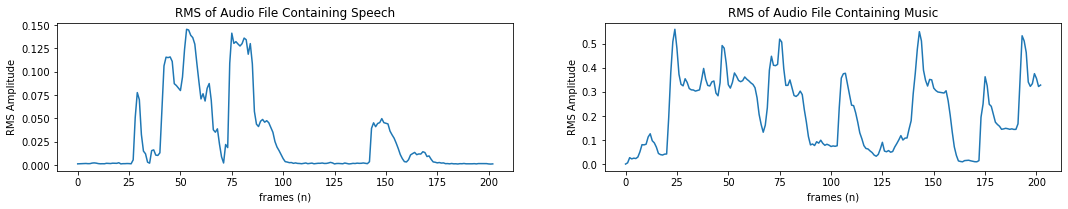

In [186]:
# Calculate RMS Values
rms_speech = librosa.feature.rms(y=y_speech,frame_length=frame_length,hop_length=hop_length)
rms_music = librosa.feature.rms(y=y_music,frame_length=frame_length,hop_length=hop_length)

# Display Results
plt.figure(figsize=(18, 6))

plt.subplot(2,2,1)
plt.plot(rms_speech.T);
plt.title('RMS of Audio File Containing Speech');
plt.xlabel('frames (n)');
plt.ylabel('RMS Amplitude');

plt.subplot(2,2,2)
plt.plot( rms_music.T);
plt.title('RMS of Audio File Containing Music');
plt.xlabel('frames (n)');
plt.ylabel('RMS Amplitude');

print("Number of frames : {}".format(rms_speech.T.size))

In [187]:
# Calculate Local Average RMS
local_rms_speech = []
local_rms_music = []
local_rms_speech_extened = []
local_rms_music_extened = []

# "low energy" frames
low_e_frames_speech = 0
low_e_frames_music = 0
test = 0

end=0
for i in range ( 0 , int( rms_speech.size/frame_freq) ):
    local_rms_speech.append( np.mean(rms_speech.T[( 50*i ):( (50)*(i+1) -1 )]) )
    local_rms_music.append ( np.mean(rms_music.T[( 50*i ):( (50)*(i+1) -1 )]) )
    end = i +1
    # Determine low_energy frames
    for index in range(50*i,(50)*(i+1)):
        local_rms_speech_extened.append(local_rms_speech[i])
        local_rms_music_extened.append(local_rms_music[i])
        if(rms_speech.T[index]<=local_rms_speech[i]) : low_e_frames_speech +=1
        else : test+=1
        if(rms_music.T[index]<=local_rms_music[i]) : low_e_frames_music +=1
if (frame_freq*end < rms_speech.size) : 
    local_rms_speech.append( np.mean(rms_speech.T[( 50*end ): rms_speech.T.size ]) )
    local_rms_music.append( np.mean(rms_music.T[( 50*end ): rms_speech.T.size ]) )

    for index in range(50*end,rms_speech.T.size):
        local_rms_speech_extened.append(local_rms_speech[end])
        local_rms_music_extened.append(local_rms_music[end])
        if(rms_speech.T[index]<=local_rms_speech[end]) : low_e_frames_speech +=1
        else : test+=1
        if(rms_music.T[index]<=local_rms_music[end]) : low_e_frames_music +=1

# Results
print(test)
print(low_e_frames_speech)

print("Percentage of frames below 50% of mean in speech : {:3.2f} %".format(low_e_frames_speech/rms_speech.T.size*100))
print("Percentage of frames below 50% of mean in music : {:3.2f} %".format(low_e_frames_music/rms_music.T.size*100))

64
139
Percentage of frames below 50% of mean in speech : 68.47 %
Percentage of frames below 50% of mean in music : 49.26 %


## Visualize RMS Data

Percentage of frames below 50% of mean in speech : 72.14 %
Percentage of frames below 50% of mean in speech : 49.29 %


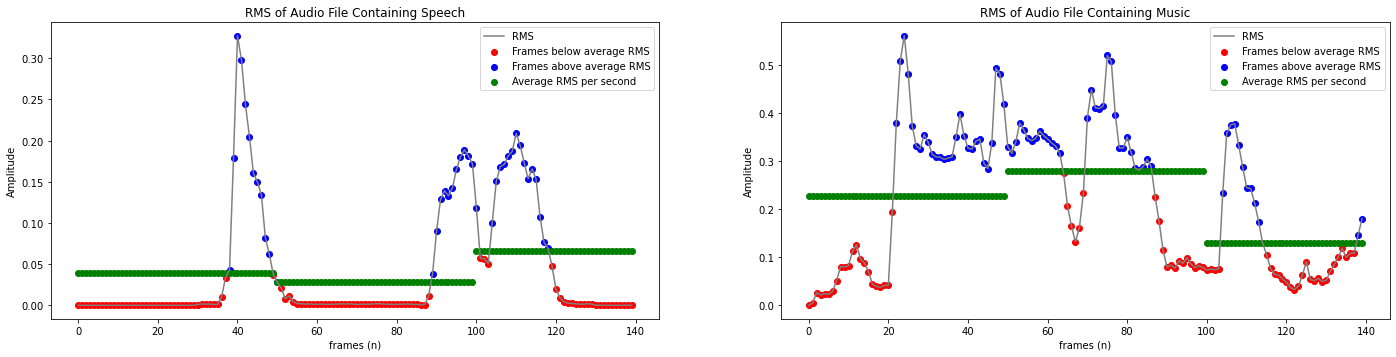

In [173]:
y_speech_below = []
x_speech_below = []
y_speech_above = []
x_speech_above = []

y_music_below = []
x_music_below = []
y_music_above = []
x_music_above = []

# Speech
for i,x in enumerate(rms_speech.T):
    if x<=local_rms_speech_extened[i]:
        y_speech_below.append(x)
        x_speech_below.append(i)
    else:
        y_speech_above.append(x)
        x_speech_above.append(i)

# Music
for i,x in enumerate(rms_music.T):
    if x<=local_rms_music_extened[i]:
        y_music_below.append(x)
        x_music_below.append(i)
    else:
        y_music_above.append(x)
        x_music_above.append(i)

# Visualise Results
plt.figure(figsize=(24, 12));

plt.subplot(2,2,1);
plt.plot(rms_speech.T,label="RMS",color='grey');
plt.scatter(x_speech_below,y_speech_below,label="Frames below average RMS",color='r');
plt.scatter(x_speech_above,y_speech_above,label="Frames above average RMS",color='b');
plt.scatter(np.arange(0,len(local_rms_speech_extened)),local_rms_speech_extened,label="Average RMS per second",color='g')
plt.title('RMS of Audio File Containing Speech');
plt.xlabel('frames (n)');
plt.ylabel('Amplitude');
plt.legend();

plt.subplot(2,2,2);
plt.plot(rms_music.T,label="RMS",color='grey');
plt.scatter(x_music_below,y_music_below ,label="Frames below average RMS",color='r');
plt.scatter(x_music_above,y_music_above,label="Frames above average RMS",color='b');
plt.scatter(np.arange(0,len(local_rms_music_extened)),local_rms_music_extened,label="Average RMS per second",color='g')
plt.title('RMS of Audio File Containing Music');
plt.xlabel('frames (n)');
plt.ylabel('Amplitude');
plt.legend();

print("Percentage of frames below 50% of mean in speech : {:3.2f} %".format(len(y_speech_below)/( len(y_speech_below) + len (y_speech_above))*100))
print("Percentage of frames below 50% of mean in speech : {:3.2f} %".format(len(y_music_below)/( len(y_music_below) + len (y_music_above))*100))


## RMS Averages ove the Entire Audio Clip

In [90]:
print("Average RMS value of Speech : {:2.5f}".format(np.mean(rms_speech)))
print("Average RMS value of Music : {:2.5f}".format(np.mean(rms_music)))
print('Music clearly has a higher mean energy, as expected\n')


low_e_frames_music = [x for x in rms_music.T if x < np.mean(rms_music)*0.5]
low_e_frames_speech = [x for x in rms_speech.T if x < np.mean(rms_speech)*0.5]

print('Percentage of frames below 50% of mean in music', 100 * len(low_e_frames_music) / rms_music.shape[1], '\n')
print('Percentage of frames below 50% of mean in speech', 100 * len(low_e_frames_speech) / rms_speech.shape[1])

Average RMS value of Speech : 0.04500
Average RMS value of Music : 0.21695
Music clearly has a higher mean energy, as expected

Percentage of frames below 50% of mean in music 38.57142857142857 

Percentage of frames below 50% of mean in speech 67.85714285714286


## Onset Detection

Text(0, 0.5, 'Normalised onset strength')

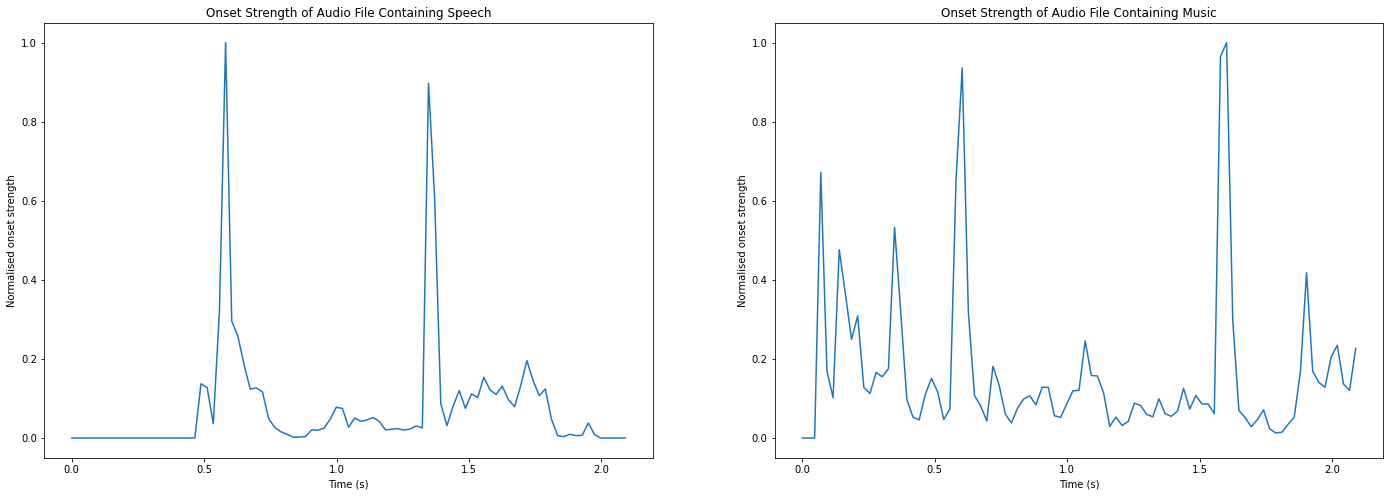

In [152]:
# Detect onset
onset_speech = librosa.onset.onset_strength(y_speech , sr_speech)
onset_music = librosa.onset.onset_strength(y_music , sr_music)

D_speech = np.abs(librosa.stft(y_speech))
D_music = np.abs(librosa.stft(y_music))

times_speech = librosa.times_like(D_speech)
times_music = librosa.times_like(D_music)

# Plot Results 
plt.figure(figsize=(24, 8));

plt.subplot(1, 2, 1)
plt.plot(times_speech,onset_speech / onset_speech.max(), label='Mean (mel)')
plt.title("Onset Strength of Audio File Containing Speech")
plt.xlabel("Time (s)")
plt.ylabel("Normalised onset strength")

plt.subplot(1, 2, 2)
plt.plot(times_music,onset_music / onset_music.max(), label='Mean (mel)')
plt.title("Onset Strength of Audio File Containing Music")
plt.xlabel("Time (s)")
plt.ylabel("Normalised onset strength")

In [104]:
# Variance of onset strength
var_onset_speech = np.var(onset_speech)
var_onset_music = np.var(onset_music)

print("Vairance of onset strength of speech file : {:2.5f} ".format(var_onset_speech))
print("Vairance of onset strength of music file : {:2.5f} ".format(var_onset_music))

Vairance of onset strength of speech file : 6.65936 
Vairance of onset strength of music file : 2.65363 


In [164]:
def peekRateOnsetStrength(y_input, sr_input, height):
    out_onset = librosa.onset.onset_strength(y_input , sr_input)
    out_onset = out_onset / out_onset.max()
    out_peaks = find_peaks(out_onset, height = height)
    print("Number of peaks {} ".format(len(out_peaks[0])))
    return len(out_peaks[0])/ librosa.get_duration(y_input,sr_input)

In [171]:
print("Peak rate of onset strength speech : {:.10f}".format(peekRateOnsetStrength(y_speech,sr_speech, 0.4))) 

print("Peak rate of onset strength music  : {:.10f}".format(peekRateOnsetStrength(y_music,sr_music,0.4))) 

Number of peaks 2 
Peak rate of onset strength speech : 0.9569274167
Number of peaks 6 
Peak rate of onset strength music  : 2.8707822502


## Spectral Flux

Text(0, 0.5, 'Normalised onset strength')

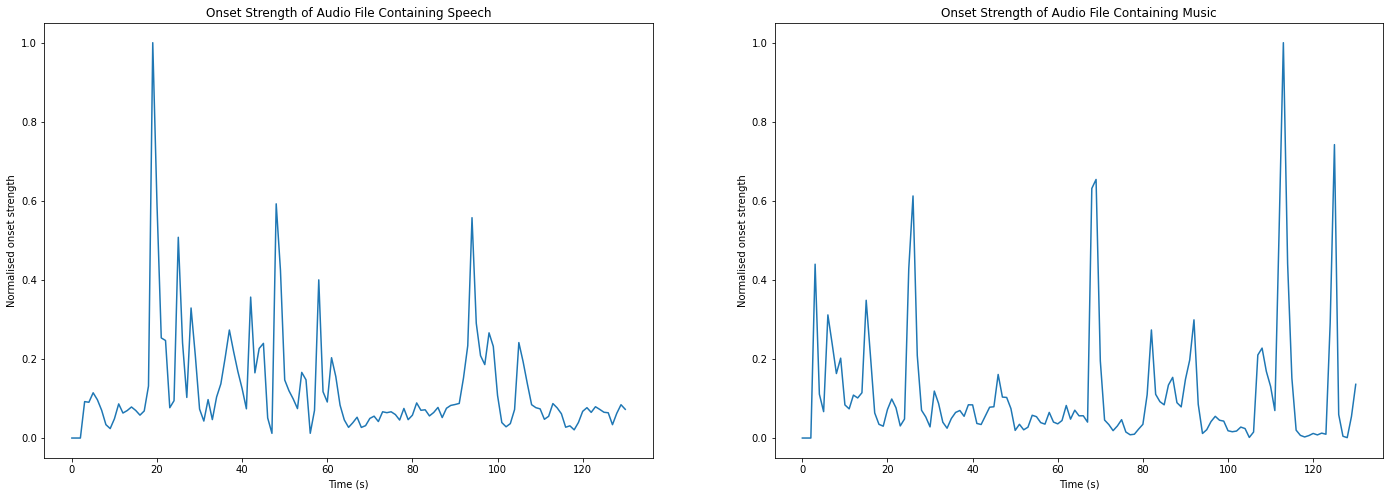

In [52]:
# Detect onset
onset_speech = librosa.onset.onset_strength(y_speech , sr_speech)
onset_music = librosa.onset.onset_strength(y_music , sr_music)

# Plot Results 
plt.figure(figsize=(24, 8));

plt.subplot(1, 2, 1)
plt.plot(onset_speech / onset_speech.max(), label='Mean (mel)')
plt.title("Onset Strength of Audio File Containing Speech")
plt.xlabel("Time (s)")
plt.ylabel("Normalised onset strength")

plt.subplot(1, 2, 2)
plt.plot(onset_music / onset_music.max(), label='Mean (mel)')
plt.title("Onset Strength of Audio File Containing Music")
plt.xlabel("Time (s)")
plt.ylabel("Normalised onset strength")

In [106]:
amplitude_music = []
amplitude_speech = []

# Set paramaters
frequency_of_frames = 50
frame_time_seconds = 1/50 
overlap_time_seconds = 0
interval = int(frame_time_seconds * 1000)
overlap = int(overlap_time_seconds * 1000)

# Initialize start and end seconds to 0 
start = 0
end = 0

# Length of audiofile in milliseconds
n = int(len(y_speech)/sr_speech*1000)

# counters and flags
counter = 1
flag = 0

# Logic for slicing
for i in range(0, 2 * n, interval): 
    if i == 0: 
        start = 0
        end = interval 
    else: 
        start = end - overlap 
        end = start + interval  
    if end >= n: 
        end = n 
        flag = 1
    counter = counter + 1
    # print("{} sample \t{} sample".format(int(start/1000*sr_speech),int(end/1000*sr_speech)-1))
    amplitude_speech.append( np.max( y_speech[int(start/1000*sr_speech) : int(end/1000*sr_speech)-1 ] ) )
    amplitude_music.append( np.max( y_music[int(start/1000*sr_speech) : int(end/1000*sr_speech)-1 ] ) )  
    if flag == 1: 
        break

In [114]:
amp_dif_speech = [ (abs(amplitude_speech[i+1]) - abs(amplitude_speech[i])) for i in range(0,len(amplitude_speech)-1) ]
amp_dif_music = [ (abs(amplitude_music[i+1]) - abs(amplitude_music[i])) for i in range(0,len(amplitude_music)-1) ]

norm_2_speech = np.sqrt( np.dot(amp_dif_speech,amp_dif_speech) )
norm_2_music = np.sqrt( np.dot(amp_dif_music,amp_dif_music) )


print("2-norm Speech : {} ".format( norm_2_speech ))
print("2-norm Music : {} ".format( norm_2_music ))


2-norm Speech : 0.3993861973285675 
2-norm Music : 1.7270933389663696 


In [91]:
spectral_flux_speech = [ abs(onset_speech[i+1] - onset_speech[i]) for i in range(0,len(onset_speech)-1) ]
spectral_flux_music = [ abs(onset_music[i+1] - onset_music[i]) for i in range(0,len(onset_music)-1) ]


norm_2_speech = np.sqrt(( np.dot(spectral_flux_speech,spectral_flux_speech) )) / len(spectral_flux_speech)
norm_2_music = np.sqrt(( np.dot(spectral_flux_music,spectral_flux_music) ) ) / len(spectral_flux_speech)

print("Variance in spectral flux speech : {} ".format( np.var(spectral_flux_speech) ))
print("Variance in spectral flux music : {} ".format( np.var(spectral_flux_music) ))

print()

print("Sum of spectral flux speech : {} ".format( np.sum(spectral_flux_speech) ))
print("Sum of spectral flux music : {} ".format( np.sum(spectral_flux_music) ))

print()

print("2-norm Speech : {} ".format( norm_2_speech ))
print("2-norm Music : {} ".format( norm_2_music ))


130

In [12]:
import time

start_time = time.time()
for a in range(100):
    y_speech, sr_speech = librosa.load(speech_file)
end_time = time.time()
elapsed_time = end_time - start_time

print(elapsed_time)

hours, rem = divmod(end_time-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

4.793252229690552
00:00:04.79
